# O Pior Cenário do Simplex (Problema de Klee-Minty)

O cubo de Klee-Minty é um problema de programação linear contruído para demonstrar a complexidade exponencial do algorítimo Simplex, no pior caso.

Enquanto o algorítimo do Simplex percorre as arestas do poliedro de restrições (visitando $2^n - 1$ vertices no pior caso), o método de Pontos Interiores atravessa a região viável, convergindo muito mais rapidamente para problemas de alta dimensionalidade.

## Formulação Matemática (simplificada):
Maximizar:$$Z = 100x_1 + 10x_2 + x_3$$Sujeito a:$$\begin{aligned}
x_1 &\le 1 \\
20x_1 + x_2 &\le 100 \\
200x_1 + 20x_2 + x_3 &\le 10000 \\
x_1, x_2, x_3 &\ge 0
\end{aligned}$$


In [ ]:
# Imports para solução dos problemas
import numpy as np
from scipy.optimize import linprog
import warnings
import time

# Imports para plot de gid
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import HalfspaceIntersection, ConvexHull
from IPython.display import Image

warnings.filterwarnings("ignore")

def generate_klee_minty(n, base=[2,5,2]):
    """
    Gera as matrizes para o problema de Klee-Minty de dimensão n.
    """
    coef_base, rhs_base, fob_base = base
    # Coeficientes da Função Objetivo (Maximizar F = Minimizar -F)
    # c[i]= 2**(n+1-j)
    c = -np.array([fob_base**(n-j-1) for j in range(n)])

    # Matrizes de Restrição (A_ub * x <= b_ub)
    A_ub = np.zeros((n, n))
    b_ub = np.zeros(n)

    for i in range(n):
        # b[i]= 5**(i+1)
        b_ub[i] = rhs_base**(i+1)
        A_ub[i, i] = coef_base**0
        # A[i,i] = 2**0
        for j in range(i):
            # A[i,j] = 2**(i+1-j)
            A_ub[i, j] = (coef_base**(i-j+1))

    return c, A_ub, b_ub

# --- Configuração do Experimento ---
N = 3  # Dimensão do problema
fob_base = 2
rhs_base = 5
coef_base = 2
c, A, b = generate_klee_minty(N, base=[coef_base, rhs_base, fob_base])

print(f"=== Problema sendo resolvido: ===\n")
print(f"Função Objetivo:")
# join faz a junção de uma lista em uma string com um separador (" + ")
fob_str = " + ".join([f"({c[j]:.0f})x_{j+1}" for j in range(N)])
print(f" Min F = {fob_str}")

print(f"\nS.a:")
for i in range(N):
    row_terms = [f"({A[i, j]:.0f})x_{j+1}" for j in range(N) if A[i, j] != 0]
    row_str = " + ".join(row_terms)
    print(f" {row_str} <= {b[i]:.0f}")

print(f"\n{'='*40}\n")


# Listas para guardar o caminho das soluções
path_simplex = []
path_interior = []

# Ponto inicial factível na origem
start_point = np.zeros(N)
path_simplex.append(start_point)
path_interior.append(start_point)

def callback_simplex(res): # pelo que entendi do site do linalg isso retorna a cada interação o valor das variáveis de interação
    path_simplex.append(res.x.copy())

def callback_interior(res):
    path_interior.append(res.x.copy())

print(f"=== Resolvendo Klee-Minty (Dimensão {N}) ===\n")

# 1. Método Simplex
start_time = time.time() # Isso calcula o tempo de execução
res_simplex = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='revised simplex', callback=callback_simplex)
end_time = time.time()
path_simplex.append(res_simplex.x)

print(f"--- SIMPLEX ---")
print(f"Iterações: {res_simplex.nit}")
print(f"Tempo: {end_time - start_time:.4f}s")
print(f"Status: {res_simplex.message}")
print(f"Valor Ótimo: {-res_simplex.fun:.2e}")

print("\n" + "="*30 + "\n")

# 2. Método de Pontos Interiores
start_time = time.time()
res_interior = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='interior-point', callback=callback_interior)
end_time = time.time()
path_interior.append(res_interior.x)

print(f"--- PONTOS INTERIORES ---")
print(f"Iterações: {res_interior.nit}")
print(f"Tempo: {end_time - start_time:.4f}s")
print(f"Status: {res_interior.message}")
print(f"Valor Ótimo: {-res_interior.fun:.2e}")

path_simplex = np.array(path_simplex) # transforma a lista em array do numpy
path_interior = np.array(path_interior)

=== Problema sendo resolvido: ===

Função Objetivo:
 Min F = (-4)x_1 + (-2)x_2 + (-1)x_3

S.a:
 (1)x_1 <= 5
 (4)x_1 + (1)x_2 <= 25
 (8)x_1 + (4)x_2 + (1)x_3 <= 125


=== Resolvendo Klee-Minty (Dimensão 3) ===

--- SIMPLEX ---
Iterações: 7
Tempo: 0.0056s
Status: Optimization terminated successfully.
Valor Ótimo: 1.25e+02


--- PONTOS INTERIORES ---
Iterações: 6
Tempo: 0.0049s
Status: Optimization terminated successfully.
Valor Ótimo: 1.25e+02


## Plot gif o caminho interior:



In [ ]:
!pip install -U kaleido==0.2.1 imageio plotly scipy

# Não achei forma mais fácil de gerar essa região viável e gif,
# e o colab que está disponível tá dando erro em um tal de kaleido
# tentei ajustar e instalar mas ainda tava dando erro lá
# então tive que usar o chatgpt para gerar essa parte do código


Gerando animação...
Gerando 14 frames com Plotly...
...
Criando GIF...

Concluído! GIF salvo como: klee_minty_plotly.gif


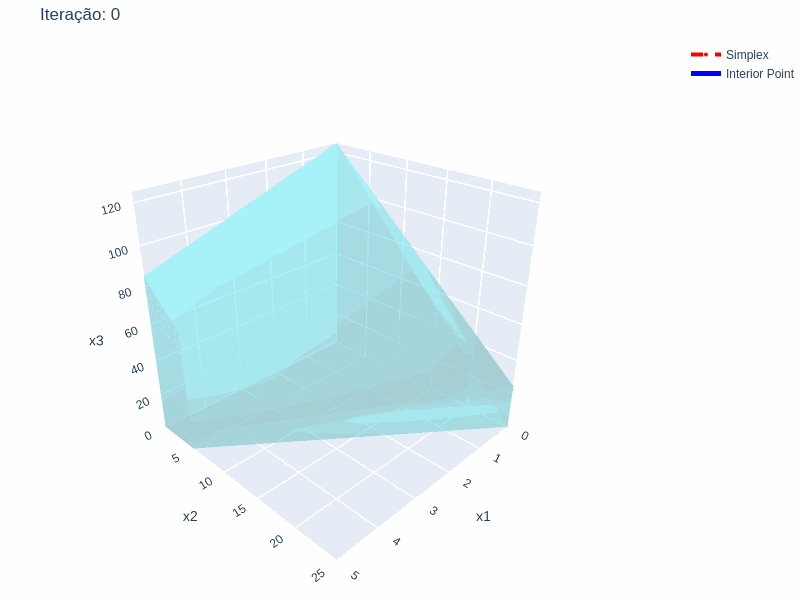

In [ ]:
# --- 1. Preparação dos Dados ---
import os
import imageio
import plotly.graph_objects as go
import shutil
print("\nGerando animação...")
# O Plotly precisa de i, j, k para desenhar as faces (Mesh3d)
try:
    halfspaces = np.vstack([np.hstack([A, -b[:, None]]), np.hstack([-np.eye(N), np.zeros((N, 1))])])
    hs = HalfspaceIntersection(halfspaces, np.array([1e-3] * N))
    verts = hs.intersections
    hull = ConvexHull(verts)

    # Extrair índices para Mesh3d
    x_hull, y_hull, z_hull = verts.T
    simplices = hull.simplices
    i_hull = simplices[:, 0]
    j_hull = simplices[:, 1]
    k_hull = simplices[:, 2]

    # Limites fixos
    xlim = [verts[:,0].min(), verts[:,0].max()]
    ylim = [verts[:,1].min(), verts[:,1].max()]
    zlim = [verts[:,2].min(), verts[:,2].max()]
except:
    print("Erro na geometria.")
    xlim = ylim = zlim = [0, 100]
    x_hull = y_hull = z_hull = []
    i_hull = j_hull = k_hull = []

# --- 4. Geração dos Quadros (Estilo do seu exemplo) ---
total_steps = max(len(path_simplex), len(path_interior))
pause_frames = 3
total_frames = total_steps + pause_frames

figs = [] # Lista para guardar as figuras (opcional, cuidado com memória se for muito grande)

print(f"Gerando {total_frames} frames com Plotly...")

# Pasta temporária
if os.path.exists("frames_plotly"):
    shutil.rmtree("frames_plotly")
os.makedirs("frames_plotly")

for frame in range(total_frames):
    fig = go.Figure()

    # Indices atuais
    idx_s = min(frame, len(path_simplex)-1)
    idx_i = min(frame, len(path_interior)-1)

    # 1. Adicionar Volume (Região Viável)
    if len(x_hull) > 0:
        fig.add_trace(go.Mesh3d(
            x=x_hull, y=y_hull, z=z_hull,
            i=i_hull, j=j_hull, k=k_hull,
            opacity=0.15,
            color='cyan',
            name='Região Viável',
            lighting=dict(ambient=0.5)
        ))

    # 2. Adicionar Simplex (Vermelho)
    fig.add_trace(go.Scatter3d(
        x=path_simplex[:idx_s+1, 0],
        y=path_simplex[:idx_s+1, 1],
        z=path_simplex[:idx_s+1, 2],
        mode='lines+markers',
        line=dict(color='red', width=4, dash='dash'),
        marker=dict(size=4, color='red'),
        name='Simplex'
    ))
    # Cabeça Simplex (Marcador maior)
    fig.add_trace(go.Scatter3d(
        x=[path_simplex[idx_s, 0]], y=[path_simplex[idx_s, 1]], z=[path_simplex[idx_s, 2]],
        mode='markers', marker=dict(size=8, color='red'), showlegend=False
    ))

    # 3. Adicionar Interior Point (Azul)
    fig.add_trace(go.Scatter3d(
        x=path_interior[:idx_i+1, 0],
        y=path_interior[:idx_i+1, 1],
        z=path_interior[:idx_i+1, 2],
        mode='lines+markers',
        line=dict(color='blue', width=5),
        marker=dict(size=4, color='blue'),
        name='Interior Point'
    ))
    # Cabeça Interior (Marcador maior)
    fig.add_trace(go.Scatter3d(
        x=[path_interior[idx_i, 0]], y=[path_interior[idx_i, 1]], z=[path_interior[idx_i, 2]],
        mode='markers', marker=dict(size=10, color='blue', symbol='diamond'), showlegend=False
    ))

    # Configuração de Layout (Fixar eixos e câmera)
    fig.update_layout(
        title=f"Iteração: {frame}",
        scene=dict(
            xaxis=dict(range=xlim, title='x1'),
            yaxis=dict(range=ylim, title='x2'),
            zaxis=dict(range=zlim, title='x3'),
            # Posição da Câmera (Isométrica)
            camera=dict(
                eye=dict(x=1.6, y=1.6, z=1.2)
            )
        ),
        width=800, height=600,
        margin=dict(l=0, r=0, b=0, t=40)
    )

    # Salvar frame individualmente
    filename = f"frames_plotly/frame_{frame:03d}.png"
    fig.write_image(filename)

    # Feedback visual de progresso
    if frame % 5 == 0: print(".", end="")

print("\nCriando GIF...")

# --- 5. Unir imagens no GIF ---
imagens = []
filenames = sorted(os.listdir("frames_plotly"))

for filename in filenames:
    file_path = os.path.join("frames_plotly", filename)
    imagens.append(imageio.v2.imread(file_path))

# Salva o GIF
output_file = "klee_minty_plotly.gif"
imageio.mimsave(output_file, imagens, duration=0.2, loop=0)

# Limpeza
shutil.rmtree("frames_plotly")

print(f"\nConcluído! GIF salvo como: {output_file}")

# Exibir no Colab
from IPython.display import Image
Image(output_file)

## Referências e Documentação

1.  **SciPy (Otimização Linear)**
    * Documentação oficial da função `linprog`, utilizada para resolver os problemas via método Simplex e Pontos Interiores.
    * [Acessar Documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)

2.  **Klee-Minty Cube (Teoria)**
    * Detalhes sobre o "Cubo de Klee-Minty", o problema perturbado utilizado para demonstrar o pior caso do algoritmo Simplex.
    * [Ler artigo no DetailedPedia](https://www.detailedpedia.com/wiki-Klee%E2%80%93Minty%20cube)

3.  **Matplotlib (Visualização)**
    * Tutorial da biblioteca `pyplot`, base para criação de gráficos estáticos e estruturação de eixos em Python.
    * [Ver Tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)